In [108]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [109]:
tests = [1,2,3,4,5,6,7]

In [110]:
def get_points(test_number):
  base_points_path = f'data/test{test_number}a.csv'
  transformed_points_path = f'data/test{test_number}b.csv'
  result_points_path = f'results/test{test_number}.csv'

  base_points = np.loadtxt(base_points_path, delimiter=',', skiprows=1)
  transformed_points = np.loadtxt(transformed_points_path, delimiter=',', skiprows=1)
  result_points = np.loadtxt(result_points_path, delimiter=',', skiprows=1)

  return (base_points, transformed_points, result_points)

def get_transformations(test_number):
  transformations_path = f'results/transformations{test_number}.json'


  with open(transformations_path, 'r') as file:
    data = json.load(file)  # Parse the JSON data

  R = np.array(data['rotationMatrix'])
  t = np.array(data['translation'])

  return (R, t)

def plot(base_points, transformed_points, matched, manual, test_number):
  fig, axes = plt.subplots(1, 2, figsize=(10, 6))

  for ax in axes:
    ax.scatter(base_points[:, 0], base_points[:, 1], linestyle='-', marker='o', color='green', s=1, label='base')
    ax.scatter(transformed_points[:, 0], transformed_points[:, 1], linestyle='-', marker='o', color='blue', s=1, label='transformed')
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(True)

  axes[0].scatter(matched[:, 0], matched[:, 1], linestyle='-', marker='o', color='red', s=1, label='matched')
  axes[1].scatter(manual[:, 0], manual[:, 1], linestyle='-', marker='o', color='red', s=1, label='manual')
  axes[0].set_title('Matched')
  axes[1].set_title('Manual')

  handles, labels = axes[0].get_legend_handles_labels()

  fig.legend(handles, labels)

  plt.suptitle(f'Test #{test_number}')
  plt.show()

def verify_test(test_number):
  base_points, transformed_points, result_points = get_points(test_number)
  R, t = get_transformations(test_number)
  manual_transformed_points = np.dot(base_points, R.T) + t
  plot(base_points, transformed_points, result_points, manual_transformed_points, test_number)

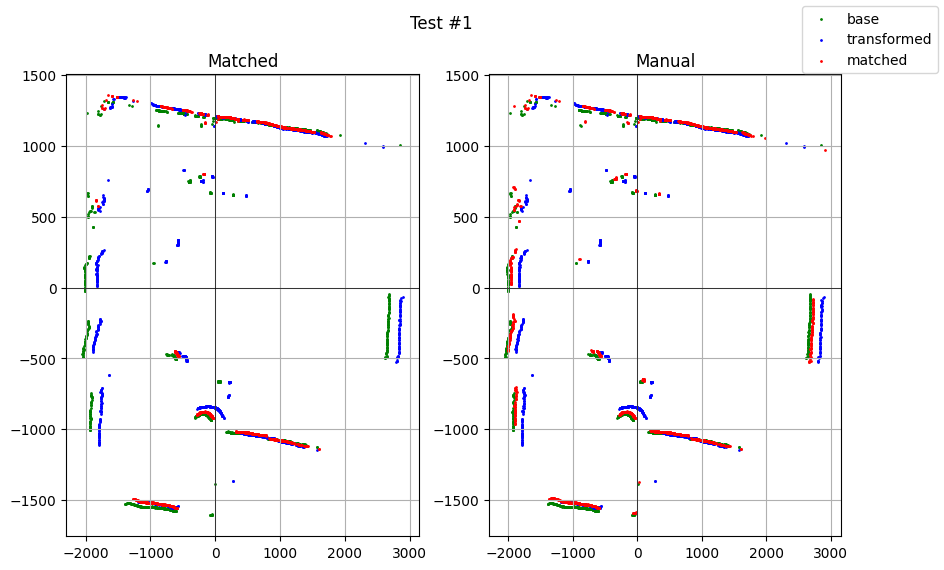

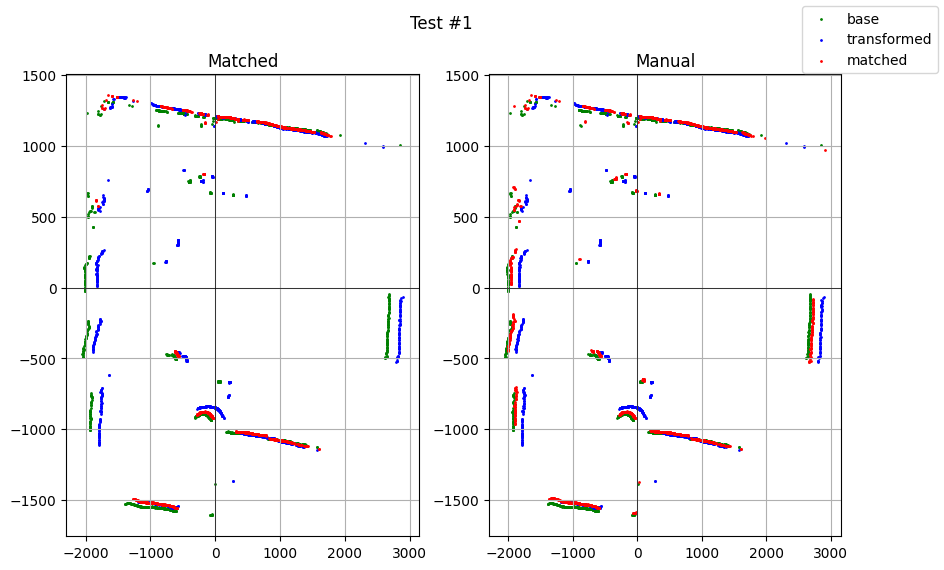

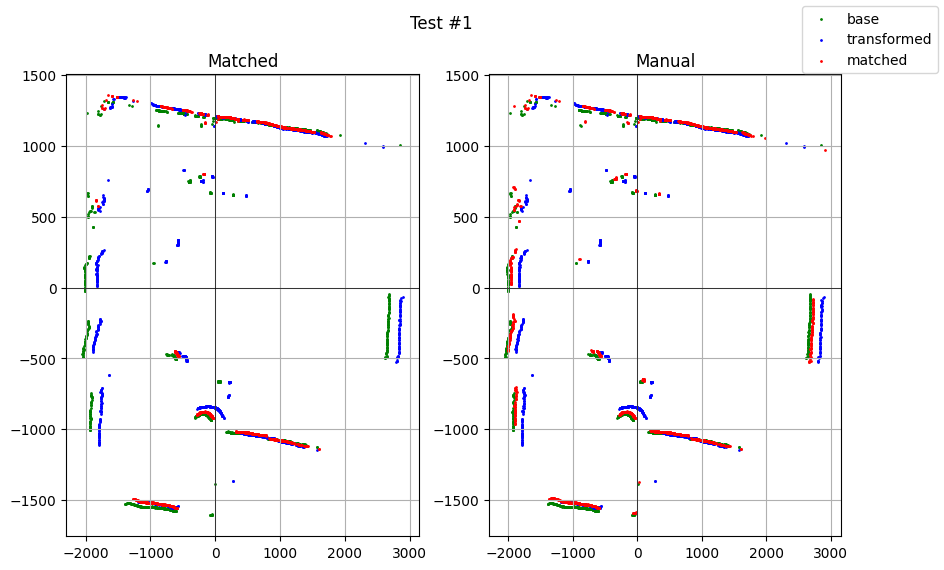

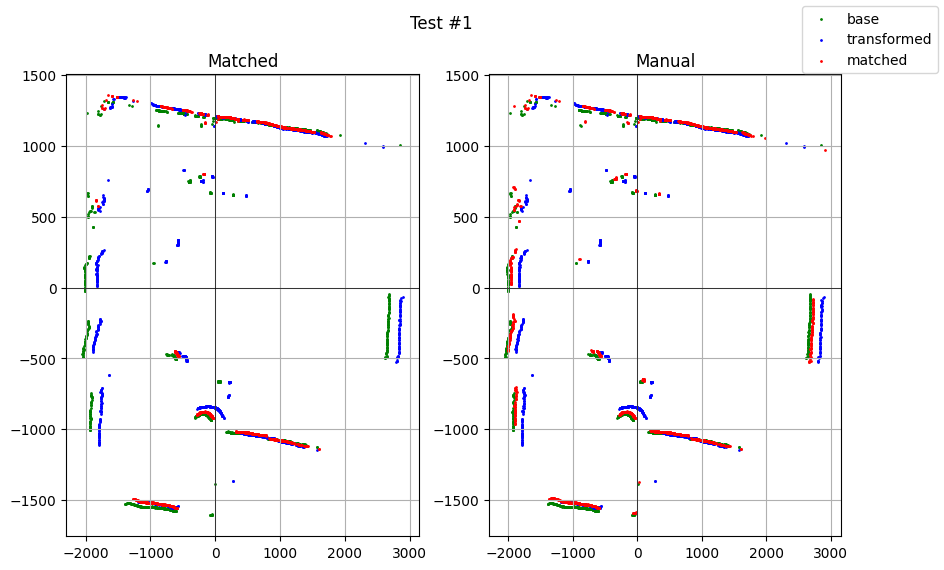

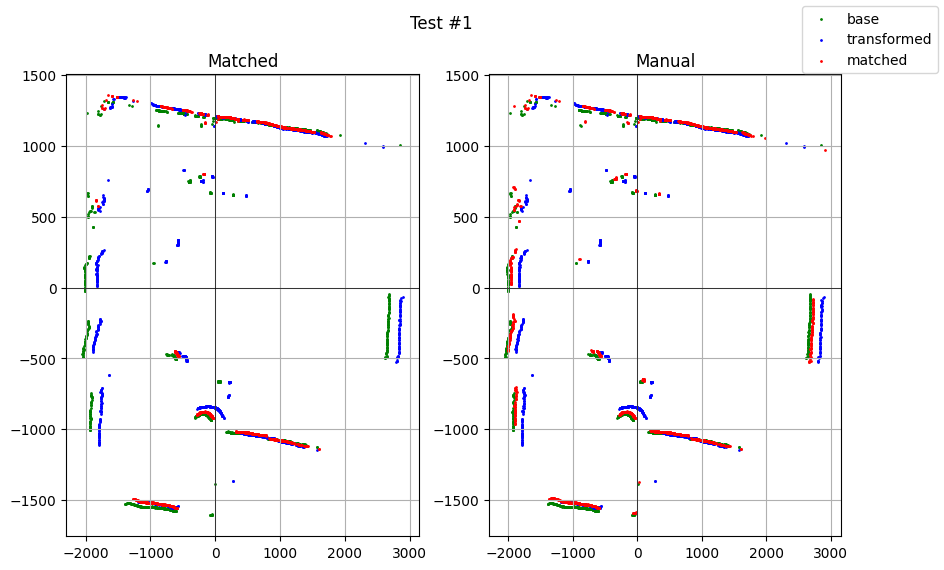

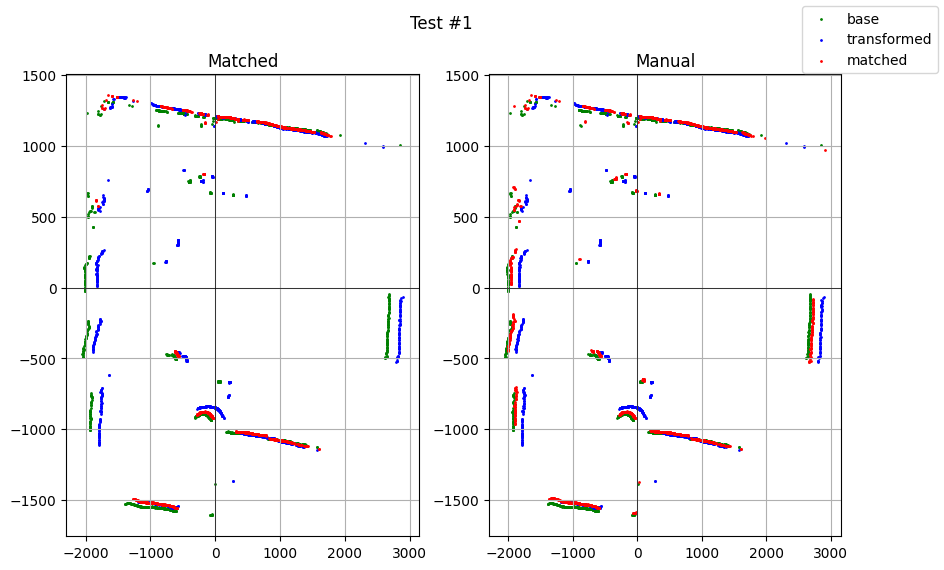

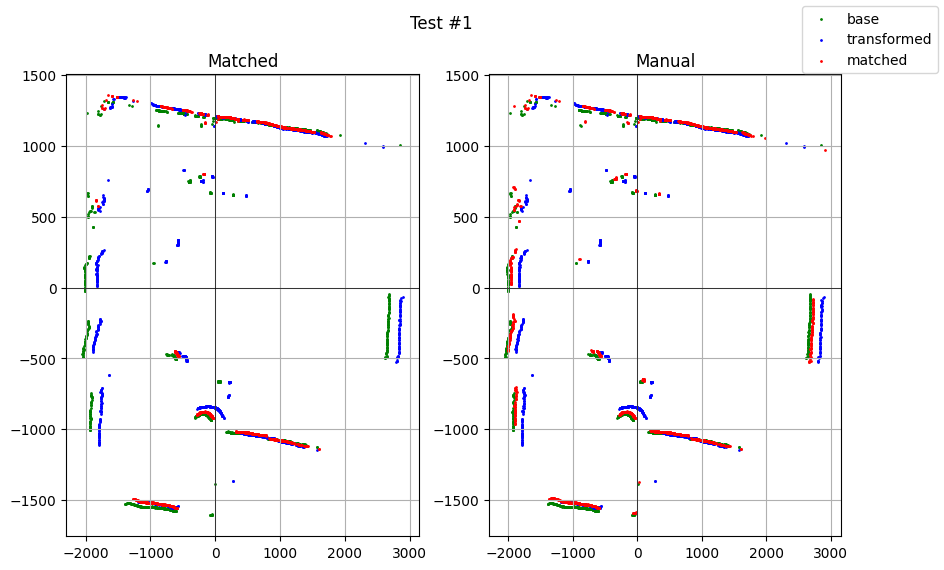

In [111]:
for test in tests:
  verify_test(1)